In [6]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')

In [72]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Analisa Descriptive Statistic

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='age', ylabel='Count'>

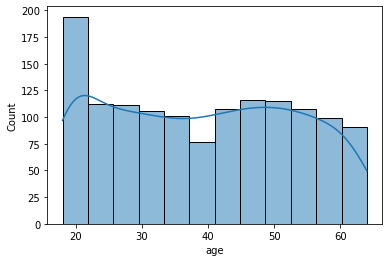

In [9]:
sns.histplot(data=df, x="age", kde=True)

In [79]:
# variance charges perokok dan bukan perokok
df.groupby(['smoker'])['charges'].var()

smoker
no     3.592542e+07
yes    1.332073e+08
Name: charges, dtype: float64

In [83]:
df.groupby(['smoker'])['charges'].var().iloc[0]

35925420.49611175

In [82]:
# variance charges perokok dan bukan perokok
df.groupby(['smoker'])['charges'].var().iloc[1]

133207311.20634927

In [ ]:
df

### Analisa Variabel Kategorik

In [16]:
df.groupby('sex')['charges'].sum()

sex
female    8.321061e+06
male      9.434764e+06
Name: charges, dtype: float64

In [17]:
df.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [19]:
df.groupby('region')['charges'].sum()/df['charges'].sum()

region
northeast    0.244633
northwest    0.227289
southeast    0.302081
southwest    0.225997
Name: charges, dtype: float64

In [23]:
df.groupby('smoker')['smoker'].count()/len(df)

smoker
no     0.795217
yes    0.204783
Name: smoker, dtype: float64

In [27]:
data_perokok = df[df['smoker']=='yes']
data_perokok.groupby('sex')['sex'].count()/len(data_perokok)

sex
female    0.419708
male      0.580292
Name: sex, dtype: float64

<AxesSubplot:title={'center':'charges'}, xlabel='region'>

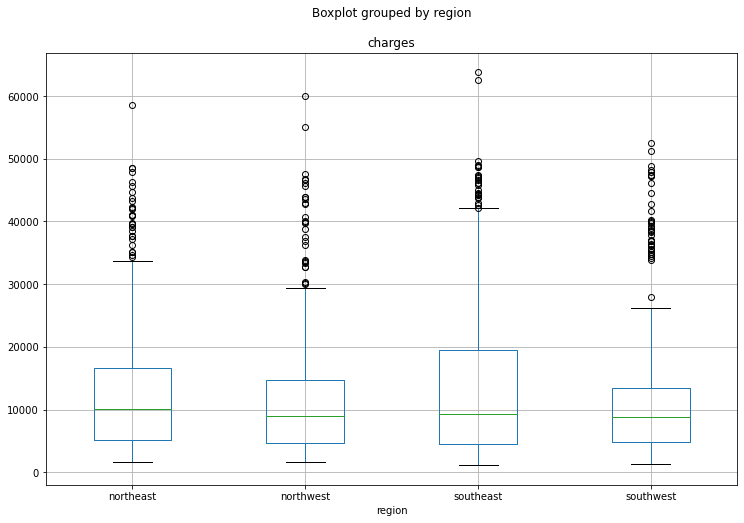

In [38]:
df.boxplot('charges', by='region', figsize=(12, 8))

## Analisa Variabel Kontinu

In [44]:
df[['bmi', 'charges']]

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520
...,...,...
1333,30.970,10600.54830
1334,31.920,2205.98080
1335,36.850,1629.83350
1336,25.800,2007.94500


### Mencari peluang besar tagihan berdasarkan BMI

In [58]:
def probability_given_bmi_condition(bmi_range, another_column_name, another_column_range):
    bmi_data = df[
        (df['bmi']>=bmi_range[0])&
        (df['bmi']<=bmi_range[1])
    ]
    
    another_column_data = bmi_data[
        (bmi_data[another_column_name]>=another_column_range[0])&
        (bmi_data[another_column_name]<=another_column_range[1])
    ]
    return len(another_column_data)/len(bmi_data)

In [100]:
from ipywidgets import interact, FloatSlider, FloatRangeSlider

In [132]:
def probability_charge_given_bmi(bmi_range, charge_range):
    bmi_data = df[
        (df['bmi']>bmi_range[0])&
        (df['bmi']<bmi_range[1])
    ]
    if len(bmi_data)==0:
        return 0
    charge_data = bmi_data[
        (bmi_data['charges']>charge_range[0])&
        (bmi_data['charges']<charge_range[1])
    ]
    print("probability : {:.3f}".format(len(charge_data)/len(bmi_data)))

In [131]:
interact(probability_charge_given_bmi,  
         bmi_range=FloatRangeSlider(min=0, max=max(df['bmi'])+1, step=1, readout_format='.1f',), 
         charge_range=FloatRangeSlider(min=0, max=max(df['charges'])+1, step=1, readout_format='.1f')
        )

interactive(children=(FloatRangeSlider(value=(13.5325, 40.597500000000004), description='bmi_range', max=54.13…

<function __main__.probability_charge_given_bmi(bmi_range, charge_range)>

In [136]:
bmi_data = df[df['bmi']>25]
charge_data = bmi_data[bmi_data['charges']>16700]
"Peluang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700 adalah {:.3f} %".format(
    len(charge_data)/len(bmi_data)*100
)

'Peluang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700 adalah 25.940 %'

### Mencari kemungkin terjadi, seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700.

In [62]:
p = probability_given_bmi_condition([25, max(df['bmi'])], 'charges', [16700, max(df['charges'])])
p

0.25892040256175664

### Berapa peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok

In [139]:
smoker_data = df[df['smoker']=='yes']
"Peluang seseorang memiliki tagihan di atas 16.7k jika diketahui dia adalah perokok sebesar {:.3f} %".format(
    len(smoker_data[smoker_data['charges']>=16700])/len(smoker_data) * 100
)

'Peluang seseorang memiliki tagihan di atas 16.7k jika diketahui dia adalah perokok sebesar 92.701 %'

### Mana yang lebih mungkin terjadi
a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k,
atau<br/>
b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas
16.7k

In [63]:
p = probability_given_bmi_condition([0, 25], 'charges', [16700, max(df['charges'])])
p

0.20647773279352227

### Mana yang lebih mungkin terjadi
a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k, atau <br/>
b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k

In [65]:
smoker_data_higher_than_25_bmi = df[
    (df['smoker']=='yes')&
    (df['bmi']>25)
]
len(smoker_data_higher_than_25_bmi[
    smoker_data_higher_than_25_bmi['charges']>16700
])/len(smoker_data_higher_than_25_bmi)

0.9817351598173516

In [67]:
len(smoker_data_higher_than_25_bmi)

219

In [69]:
len(smoker_data_higher_than_25_bmi[smoker_data_higher_than_25_bmi['charges']>16700])

215

In [70]:
non_smoker_data_higher_than_25_bmi = df[
    (df['smoker']=='no')&
    (df['bmi']>25)
]
len(non_smoker_data_higher_than_25_bmi[
    non_smoker_data_higher_than_25_bmi['charges']>16700
])/len(non_smoker_data_higher_than_25_bmi)

0.0779816513761468

In [141]:
a = df[df['charges']>=16700]
len(a[a['bmi']>=25])/len(a)

0.8473053892215568

In [142]:
a = df[df['charges']>=16700]
len(a[a['bmi']<25])/len(a)

0.15269461077844312

In [145]:
a = df[
    (df['charges']>=16700)&
    (df['bmi']>=25)
]
len(a[a['smoker']=='yes'])/len(a)

0.7597173144876325

In [146]:
len(a[a['smoker']=='no'])/len(a)

0.24028268551236748

In [152]:
from statsmodels.stats.weightstats import ztest

In [164]:
zscore, p_value = ztest(
    df[df['smoker']=='yes']['charges'].values, 
    df[df['smoker']=='no']['charges'].values, 
    alternative='larger'
)
print('zscore: {:.2f}, p_value: {}'.format(zscore, p_value))

zscore: 46.66, p_value: 0.0


In [165]:
zscore, p_value = ztest(
    df[df['bmi']>25]['charges'].values, 
    df[df['bmi']<25]['charges'].values, 
    alternative='larger'
)
print('zscore: {:.2f}, p_value: {}'.format(zscore, p_value))

zscore: 4.31, p_value: 8.348004956755111e-06


In [171]:
zscore, p_value = ztest(
    df[df['sex']=='male']['bmi'].values, 
    df[df['sex']=='female']['bmi'].values, 
    alternative='two-sided'
)
print('zscore: {:.2f}, p_value: {}'.format(zscore, p_value))

zscore: 1.70, p_value: 0.08974343679943912


In [170]:
help(ztest)

Help on function ztest in module statsmodels.stats.weightstats:

ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
    test for mean based on normal distribution, one or two samples
    
    In the case of two samples, the samples are assumed to be independent.
    
    Parameters
    ----------
    x1 : array_like, 1-D or 2-D
        first of the two independent samples
    x2 : array_like, 1-D or 2-D
        second of the two independent samples
    value : float
        In the one sample case, value is the mean of x1 under the Null
        hypothesis.
        In the two sample case, value is the difference between mean of x1 and
        mean of x2 under the Null hypothesis. The test statistic is
        `x1_mean - x2_mean - value`.
    alternative : str
        The alternative hypothesis, H1, has to be one of the following
    
           'two-sided': H1: difference in means not equal to value (default)
           'larger' :   H1: difference in means la